In [108]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder



In [109]:
housing_data_uncleaned = pd.read_csv("data/PrimaryDataset-MLS-RentalProperties.csv")

print(housing_data_uncleaned.shape)
housing_data_uncleaned.info()



(1749, 77)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 77 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   List Number                           1749 non-null   object 
 1   Agency Phone                          1736 non-null   object 
 2   Listing Agent                         1749 non-null   object 
 3   Co-Listing Agent                      285 non-null    object 
 4   Property Type                         1749 non-null   object 
 5   Card Format                           1749 non-null   object 
 6   Book Section                          1749 non-null   object 
 7   Property Sub Type                     1749 non-null   object 
 8   Listing Contract Date                 1749 non-null   object 
 9   Back on Market Date                   78 non-null     object 
 10  Status                                1749 non-null   object 
 11  Status

In [110]:
housing_data_uncleaned.columns

Index(['List Number', 'Agency Phone', 'Listing Agent', 'Co-Listing Agent',
       'Property Type', 'Card Format', 'Book Section', 'Property Sub Type',
       'Listing Contract Date', 'Back on Market Date', 'Status',
       'Status Change Timestamp', 'Original List Price', 'List Price',
       'Living Area Source', 'MLS Area Major', 'Lock Box Number',
       'Street Direction Prefix', 'Street Direction Suffix',
       'Non-Representative Compensation Type', 'City', 'State', 'County',
       'Country', 'Postal Code', 'Stories Total', 'Stories', 'Latitude',
       'Longitude', 'GeoID', 'Living Area', 'Year Built', 'Direction Faces',
       'Lot Size Dimensions', 'Bedrooms Total', 'Bathrooms Total',
       'Bathrooms Full', 'Bathrooms Half', 'Parcel Number', 'Owner Name',
       'mod_timestamp', 'Association Fee Frequency', 'Occupant Type',
       'Listing Agreement', 'Association Fee 2 Frequency', 'Listing Service',
       'Lease Term', 'Association Fee', 'Building Area Total', 'Garage Sp

In [111]:
relevant_columns = [
    'List Price', 'Bedrooms Total', 'Bathrooms Total', 'Living Area', 
    'MLS Area Major', 'Year Built', 
    'Lot Size Acres', 'Days on Market', 'Non-Representative Compensation',
    'Waterfront YN', 'Garage YN', 'Stories Total', 'Stories', 'Bedrooms Total', 'Bathrooms Total',
    'Bathrooms Full', 'Bathrooms Half', 'Garage YN', 'Garage Spaces', 'Original List Price', 'Latitude', 'Longitude', 'Rooms', 'Features'
]

numerical_columns = [
    'List Price', 'Bedrooms Total', 'Bathrooms Total', 'Living Area', 
    'MLS Area Major', 'Year Built', 
    'Lot Size Acres', 'Days on Market', 'Non-Representative Compensation',
    'Stories Total', 'Stories', 'Bedrooms Total', 'Bathrooms Total',
    'Bathrooms Full', 'Bathrooms Half', 'Garage Spaces', 'Original List Price', 'Latitude', 'Longitude'
]

# Drop the irrelevant columns
numerical_housing_data = housing_data_uncleaned[numerical_columns]



In [112]:
numerical_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   List Price                       1749 non-null   int64  
 1   Bedrooms Total                   1749 non-null   int64  
 2   Bathrooms Total                  1749 non-null   int64  
 3   Living Area                      1749 non-null   float64
 4   MLS Area Major                   1749 non-null   int64  
 5   Year Built                       1749 non-null   int64  
 6   Lot Size Acres                   1283 non-null   float64
 7   Days on Market                   1749 non-null   int64  
 8   Non-Representative Compensation  1732 non-null   float64
 9   Stories Total                    1742 non-null   float64
 10  Stories                          869 non-null    float64
 11  Bedrooms Total                   1749 non-null   int64  
 12  Bathrooms Total     

In [113]:
housing_data = numerical_housing_data.dropna()

In [114]:
housing_data

# housing_data.to_csv('data/numerical_housing_data.csv', index=False)


In [115]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
x_scaled = scaler.fit_transform(housing_data)

pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(x_scaled)

model1 = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', random_state=12)

model1.fit(x_pca)

predict = model1.predict(x_pca)
anomalies = x_scaled[predict == -1]

In [116]:
anomalies

array([[-5.52480397e-01, -2.71560869e-01, -8.03852068e-01,
        -3.88063552e-01,  3.20074574e+00,  1.00245621e+00,
        -5.59808531e-02, -9.97880513e-01, -3.48209609e-01,
        -5.97056016e-02, -6.62369938e-01, -2.71560869e-01,
        -8.03852068e-01, -3.38405594e-01, -8.02130275e-01,
         5.29175447e-01, -6.08042909e-01, -2.79942560e+00,
         2.23587264e+00],
       [ 1.45210556e+00,  3.57555144e+00,  2.01377374e+00,
         2.84919306e+00, -1.03073066e+00, -7.04662659e-01,
        -5.54287520e-02, -8.51158763e-01, -3.48209609e-01,
        -5.97056016e-02, -6.62369938e-01,  3.57555144e+00,
         2.01377374e+00,  3.69871378e+00, -8.02130275e-01,
         5.29175447e-01,  1.33503901e+00, -8.22839633e-02,
        -1.79279692e-01],
       [-1.25408548e+00, -2.71560869e-01, -2.21266497e+00,
        -9.17892784e-01, -5.91003130e-01, -3.58910489e+00,
        -5.63182482e-02,  4.66557903e+00, -2.74092310e-01,
        -5.97056016e-02, -6.62369938e-01, -2.71560869e-01,
    

In [117]:
predict
len(anomalies)/ len(x)

0.03529411764705882

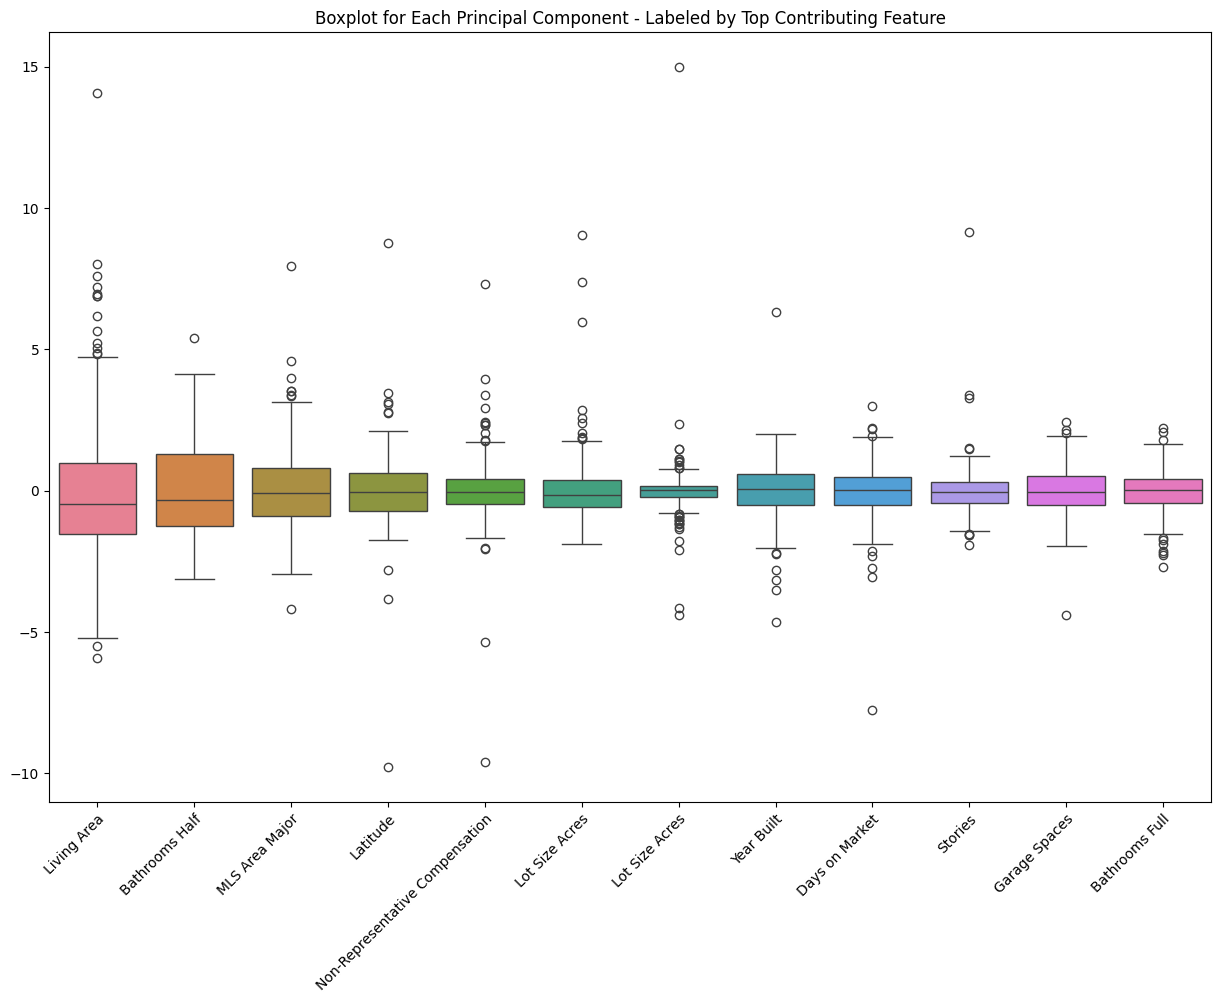

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Fit the PCA as before
pca = PCA(n_components=0.95)  # Retaining 95% of variance
x_pca = pca.fit_transform(x_scaled)

# Step 2: Create a DataFrame for the principal components
pca_columns = [f'PC{i+1}' for i in range(x_pca.shape[1])]
pca_df = pd.DataFrame(x_pca, columns=pca_columns)

# Step 3: Get the contributions of each original feature to each principal component
loadings = pca.components_.T  # Transpose to get original features as rows
contributions_df = pd.DataFrame(loadings, index=numerical_columns, columns=pca_columns)

# Step 4: Get the top contributing feature for each principal component (for labeling purposes)
top_features_per_pc = contributions_df.abs().idxmax()

# Step 5: Create a box plot and label each principal component by its strongest contributing original feature
plt.figure(figsize=(15, 10))
sns.boxplot(data=pca_df)

# Rotate the text diagonally and align it so it reads from top to bottom
plt.xticks(range(len(top_features_per_pc)), top_features_per_pc, rotation=45, ha="right", rotation_mode="anchor")

# Title
plt.title('Boxplot for Each Principal Component - Labeled by Top Contributing Feature')
plt.show()




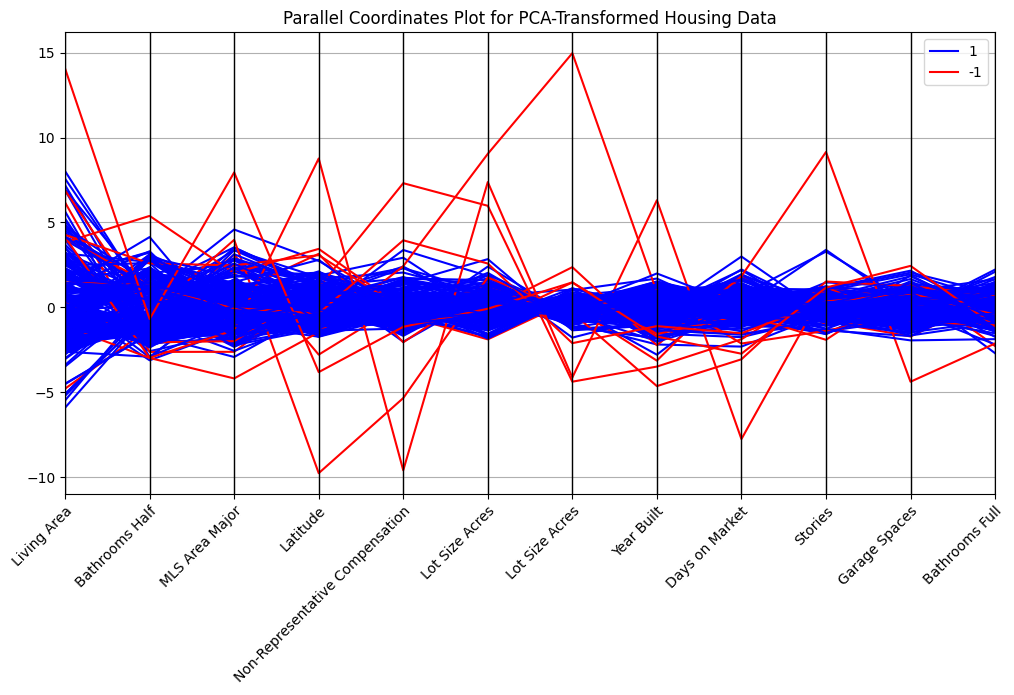

In [126]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import parallel_coordinates

# Step 1: Fit the PCA as before
pca = PCA(n_components=0.95)  # Retaining 95% of variance
x_pca = pca.fit_transform(x_scaled)

# Step 2: Create a DataFrame for the principal components
pca_columns = [f'PC{i+1}' for i in range(x_pca.shape[1])]
pca_df = pd.DataFrame(x_pca, columns=pca_columns)

# Step 3: Get the contributions of each original feature to each principal component
loadings = pca.components_.T  # Transpose to get original features as rows
contributions_df = pd.DataFrame(loadings, index=numerical_columns, columns=pca_columns)

# Step 4: Get the top contributing feature for each principal component (for labeling purposes)
top_features_per_pc = contributions_df.abs().idxmax()

# Step 5: Add anomaly labels to the PCA DataFrame
pca_df['anomaly'] = predict  # Anomalies (-1) and normal points (1)

# Step 6: Parallel Coordinates Plot with PCA data and anomaly labels
plt.figure(figsize=(12, 6))
parallel_coordinates(pca_df, 'anomaly', color=['blue', 'red'])

# Step 7: Adjust the x-axis labels (principal components) with top contributing original feature names
plt.xticks(range(len(top_features_per_pc)), top_features_per_pc, rotation=45, ha="right", rotation_mode="anchor")

# Title
plt.title('Parallel Coordinates Plot for PCA-Transformed Housing Data')
plt.show()


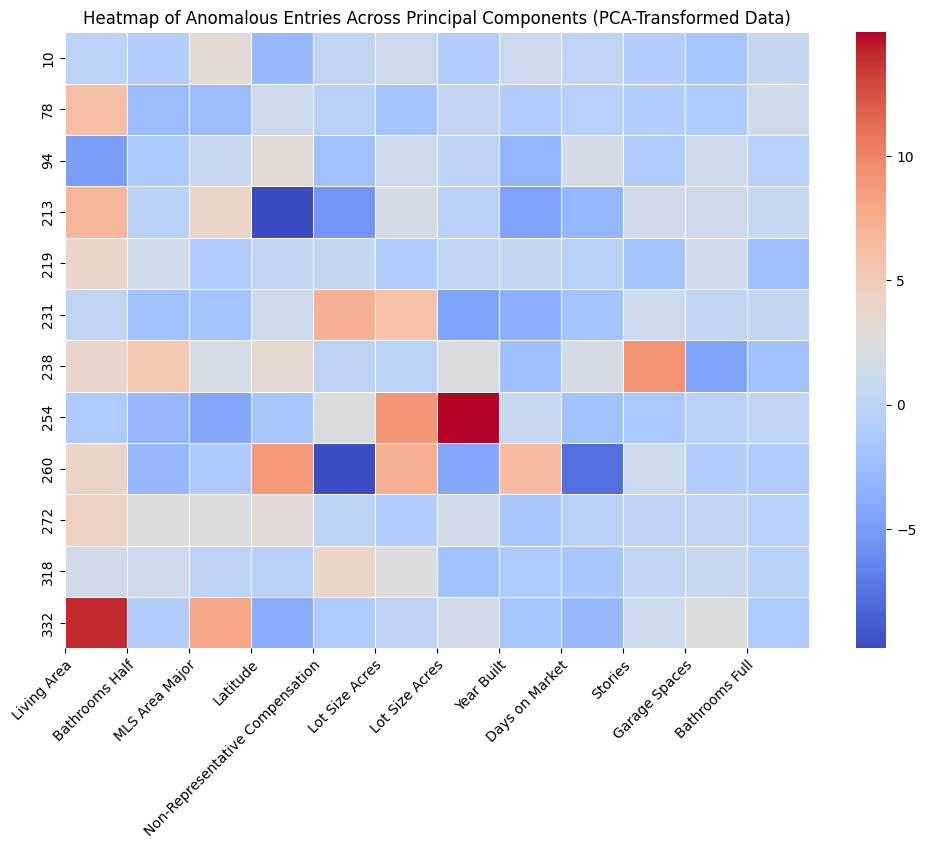

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Fit the PCA as before
pca = PCA(n_components=0.95)  # Retaining 95% of variance
x_pca = pca.fit_transform(x_scaled)

# Step 2: Create a DataFrame for the principal components
pca_columns = [f'PC{i+1}' for i in range(x_pca.shape[1])]
pca_df = pd.DataFrame(x_pca, columns=pca_columns)

# Step 3: Get the contributions of each original feature to each principal component
loadings = pca.components_.T  # Transpose to get original features as rows
contributions_df = pd.DataFrame(loadings, index=numerical_columns, columns=pca_columns)

# Step 4: Get the top contributing feature for each principal component (for labeling purposes)
top_features_per_pc = contributions_df.abs().idxmax()

# Step 5: Filter the PCA data to show only anomalies (-1)
anomalous_data = pca_df[predict == -1]

# Step 6: Plot a heatmap of the anomalous entries (use PCA-transformed data)
plt.figure(figsize=(12, 8))
sns.heatmap(anomalous_data, cmap='coolwarm', annot=False, linewidths=0.5)

# Step 7: Adjust x-axis labels to reflect original features (diagonal or vertical)
plt.xticks(range(len(top_features_per_pc)), top_features_per_pc, rotation=45, ha="right", rotation_mode="anchor")

# Title
plt.title('Heatmap of Anomalous Entries Across Principal Components (PCA-Transformed Data)')
plt.show()



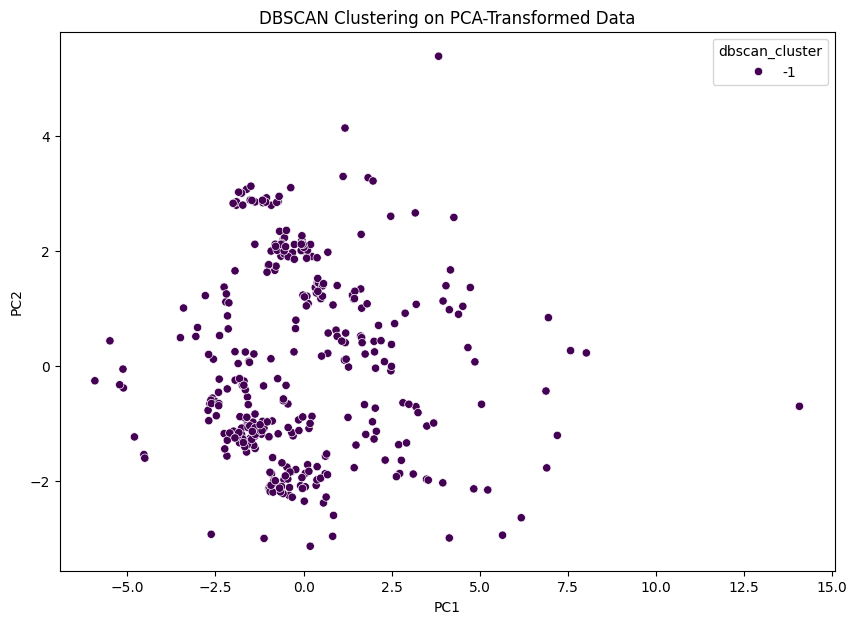

Number of points flagged by both DBSCAN and Isolation Forest: 0


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,dbscan_cluster,anomaly_iforest


In [128]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Fit DBSCAN on the PCA-transformed data
dbscan_model = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on your data
dbscan_labels = dbscan_model.fit_predict(x_pca)

# Step 2: Add DBSCAN cluster labels to the PCA DataFrame
pca_df['dbscan_cluster'] = dbscan_labels

# Step 3: Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['dbscan_cluster'], palette='viridis')
plt.title('DBSCAN Clustering on PCA-Transformed Data')
plt.show()

# Step 4: Cross-examine DBSCAN clusters with Isolation Forest results
pca_df['anomaly_iforest'] = predict  # Add Isolation Forest anomaly labels (-1 for anomalies, 1 for normal)

# Compare clusters and anomalies
cross_examined = pca_df[(pca_df['dbscan_cluster'] != -1) & (pca_df['anomaly_iforest'] == -1)]

print(f"Number of points flagged by both DBSCAN and Isolation Forest: {len(cross_examined)}")
cross_examined
